<a href="https://colab.research.google.com/github/ych1997/CS/blob/master/final_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1: 切換 TensorFlow 版本至 2.x

In [0]:
%tensorflow_version 2.x

2: 載入套件及資料集

In [0]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

#mnist
from tensorflow.keras.datasets import mnist

# 3: 資料前處理 (Data Preprocessing)

In [0]:
name_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [0]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = mnist.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

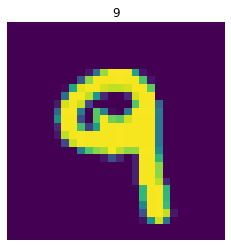

In [5]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [6]:
X_train[87].shape

(28, 28)

In [0]:
X_train=X_train.reshape(60000,28,28,1)#正規化
X_test=X_test.reshape(10000,28,28,1)#正規化

In [8]:
X_train[87].shape

(28, 28, 1)

# 4: 建立用於分類 CIFAR 10 的卷積神經網路
在這個部分，我們將逐步帶領大家建立經典的 CNN 模型 LeNet-5 的變形。
LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量。

In [0]:
model = Sequential()

# First convolutional block
model.add(Conv2D(16, (3, 3), input_shape=(28, 28,1), padding='same', activation='relu'))
model.add(MaxPool2D())

# Second convolutional block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

# Third convolutional block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(GlobalAveragePooling2D()) #全域平均池化層

# Fully-connected layers as a classfier
model.add(Dense(units=54, activation='relu'))

# Ouput layer: # of neurons = # of classes with softmax activation
model.add(Dense(units=10, activation='softmax')) #輸出是固定的

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 54)                3

# 編譯模型: 設定模型訓練時的設定

Optimizer: Stochastic Gradient Descent (SGD)
Loss: categorical cross-entropy

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

# 訓練模型: 透過訓練來學習分類資料的函數

In [12]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=3,
          validation_data=(X_test, y_test)
          )

Epoch 1/3
469/469 [==============================] - 43s 91ms/step - loss: 1.0193 - categorical_accuracy: 0.6625 - val_loss: 0.4790 - val_categorical_accuracy: 0.8452
Epoch 2/3
469/469 [==============================] - 40s 84ms/step - loss: 0.3794 - categorical_accuracy: 0.8826 - val_loss: 0.2959 - val_categorical_accuracy: 0.9119
Epoch 3/3
469/469 [==============================] - 39s 84ms/step - loss: 0.2734 - categorical_accuracy: 0.9163 - val_loss: 0.2130 - val_categorical_accuracy: 0.9345


In [0]:
model.save_weights('LeNet5_CIFAR10.h5')

模型預測: 預測資料集的準確率

In [14]:
model.load_weights('LeNet5_CIFAR10.h5')

score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2130 - categorical_accuracy: 0.9345
Train Accuracy: 92.98499822616577
Test Accuracy: 93.4499979019165


In [15]:
model.layers

# 5: 另一種使用 Sequential 建立模型的方式

In [0]:
CNN_layers = [Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=54, activation='relu'),
             Dense(units=10, activation='softmax')]

In [17]:
CNN_layers + FC_layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 54)                3

In [19]:
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 54)               

# 與使用 model.add 建立模型的差異？

In [0]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

model_2.load_weights('LeNet5_CIFAR10.h5')

In [21]:
score_train = model_2.evaluate(X_train, y_train, batch_size=1024)
score_test = model_2.evaluate(X_test, y_test, batch_size=1024)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10/10 [==============================] - 2s 178ms/step - loss: 0.2130 - categorical_accuracy: 0.9345
Train Accuracy: 92.98499822616577
Test Accuracy: 93.4499979019165


# 6: 遷移學習 (Transfer Learning) 中的 Layer Transfer 的技巧

In [0]:
# Load CIFAR 100
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()


# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

In [23]:
U_train[87].shape

(32, 32, 3)

In [0]:
CNN_layers = [Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
 
FC_layers = [Dense(units=54, activation='relu'),
             Dense(units=100, activation='softmax')]

LeNet-5 for CIFAR-100

In [0]:
# From LeNet-5 for CIFAR-10
CNN_layers
 
# New FC layers for CIFAR-100
FC_layers_CF100 = [Dense(units=15, activation='relu'),
                   Dense(units=30, activation='relu'),
                   Dense(units=100, activation='softmax')]

CNN_layers 是跟人家借來的。

In [0]:
FC_layers_CF100 = [Dense(units=15, activation='relu'),
                   Dense(units=30, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [27]:
model_CF100 = Sequential(CNN_layers+FC_layers_CF100)
model_CF100.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 64)          18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)               

對照一下和 LeNet-5 for CIFAR-10 的差別

In [28]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 54)               

遷移學習的訓練方式

Fine-tune: 新資料集的樣本數夠多，整個模型重新訓練

Frozen: 當新資料集的樣本數不夠多，凍結借來的部分，只針對新建立的神經網路層訓練

In [0]:
for layer in CNN_layers:
    layer.trainable = False

In [30]:
model_CF100.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 64)          18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)               

In [39]:
model_CF100.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

model_CF100.fit(U_train, v_train,
                batch_size=128, 
                epochs=5,
                validation_data=(U_test, v_test)
                )

Epoch 1/5
391/391 [==============================] - 49s 126ms/step - loss: 4.1936 - categorical_accuracy: 0.0509 - val_loss: 4.0957 - val_categorical_accuracy: 0.0626
Epoch 2/5
391/391 [==============================] - 48s 122ms/step - loss: 4.0206 - categorical_accuracy: 0.0707 - val_loss: 3.9927 - val_categorical_accuracy: 0.0740
Epoch 3/5
391/391 [==============================] - 47s 121ms/step - loss: 3.8851 - categorical_accuracy: 0.0886 - val_loss: 3.8444 - val_categorical_accuracy: 0.0969
Epoch 4/5
391/391 [==============================] - 47s 121ms/step - loss: 3.7643 - categorical_accuracy: 0.1070 - val_loss: 3.7348 - val_categorical_accuracy: 0.1126
Epoch 5/5
391/391 [==============================] - 47s 121ms/step - loss: 3.6738 - categorical_accuracy: 0.1202 - val_loss: 3.6508 - val_categorical_accuracy: 0.1294


# 借來的神經網路 (的權重) 會如何變化？Frozen 的場合

In [40]:
score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2130 - categorical_accuracy: 0.9345
Train Accuracy: 92.98499822616577
Test Accuracy: 93.4499979019165


借來的神經網路 (的權重) 會如何變化？Fine-tune 的場合

In [41]:
for layer in CNN_layers:
    layer.trainable = True

model_CF100.fit(U_train, v_train,
                batch_size=128, 
                epochs=5,
                validation_data=(U_test, v_test)
                )

Epoch 1/5
391/391 [==============================] - 47s 119ms/step - loss: 3.5980 - categorical_accuracy: 0.1303 - val_loss: 3.6843 - val_categorical_accuracy: 0.1181
Epoch 2/5
391/391 [==============================] - 47s 120ms/step - loss: 3.5323 - categorical_accuracy: 0.1404 - val_loss: 3.4941 - val_categorical_accuracy: 0.1480
Epoch 3/5
391/391 [==============================] - 48s 122ms/step - loss: 3.4808 - categorical_accuracy: 0.1477 - val_loss: 3.4865 - val_categorical_accuracy: 0.1524
Epoch 4/5
391/391 [==============================] - 46s 119ms/step - loss: 3.4378 - categorical_accuracy: 0.1546 - val_loss: 3.4351 - val_categorical_accuracy: 0.1614
Epoch 5/5
391/391 [==============================] - 47s 120ms/step - loss: 3.3918 - categorical_accuracy: 0.1623 - val_loss: 3.3842 - val_categorical_accuracy: 0.1715


In [42]:
model_CF100.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 64)          18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)               

In [43]:
score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2130 - categorical_accuracy: 0.9345
Train Accuracy: 92.98499822616577
Test Accuracy: 93.4499979019165


使用 Layer Transfer 的注意事項
若目的不同 (如；分類總數不同)，則須重新定義不同的全連接層
若資料的輸入尺寸不同 (如：channel 數不同)，則也需針對輸入的部分調整